# Anomaly Detection in Time Series Data

This package provides anomaly detection technique in time series data where data comprises of signals of same kind. This technique finds patterns in the data that do not exhibit expected behavior. A wide range of applications can use this technique, for example, system health monitoring for machine operations, fraud detection in credit card transactions, health care, cyber-security etc. For demonstration purpose, we present anomaly detection in time series data that simulates the behavior of some operational events in a plant. 

In this package, the procedure of anomaly detection is twofold:
* First identify ground truth signatures that are considered as normal operation
* Then detect certain anomalous behavior in any signal in the data

The package makes following features available to the user:

* [Data Analysis](#Data-Analysis)
  * [Time series plot of signals](#Time-series-plot-of-signals)
  * [Box plot of signals](#Box-plot-of-signals)
  * [Correlation analysis](#Correlation-analysis)
  * [Fourier transform and spectrogram analysis](#Fourier-transform-and-spectrogram-analysis)

* [Ground truth identification](#Ground-truth-identification)
  * [Signal filtering](#Signal-filtering)
  * [Events identification in filtered data](#Events-identification-in-filtered-data)

* [Anomaly detection techniques](#Anomaly-detection-techniques)
  * [Train Test Data](#Train-Test-Data)
  * [Hotelling's T-squared Statistic Model](#Hotelling's-T-squared-Statistic-Model)

## Data Import and Analysis

In [1]:
from ADTS.import_data import import_data
data = import_data(path = 'Data', # path of the data directory
                   datafile = 'simulated_data.csv', # name of data file
                   generate_data = True # use False if simulated_data.csv is already available 
                  )

[Info] Generating Simulation Data...


In [2]:
# This simulated time series data has 10 signals with 1 min sampling frequency starting from a random time stamp
data.head()

,signal1,signal10,signal2,signal3,signal4,signal5,signal6,signal7,signal8,signal9
2010-01-01 00:00:00,499.336444,495.246179,489.336444,498.001894,492.075215,496.753944,500.901529,490.901529,496.563940,490.602356
2010-01-01 00:01:00,506.736446,495.246179,496.736446,498.001894,492.075215,496.753944,505.158868,495.158868,496.563940,490.602356
2010-01-01 00:02:00,509.545029,501.536929,499.545029,500.205070,494.883798,499.875049,511.137097,501.137097,501.936762,496.580585
2010-01-01 00:03:00,513.131705,505.697759,503.131705,504.397153,499.388404,504.379655,514.379998,504.379998,505.785070,500.741414
2010-01-01 00:04:00,517.764130,510.970188,507.764130,510.807762,505.799013,510.477742,518.186770,508.186770,511.370021,506.326365


### Time series plot of signals

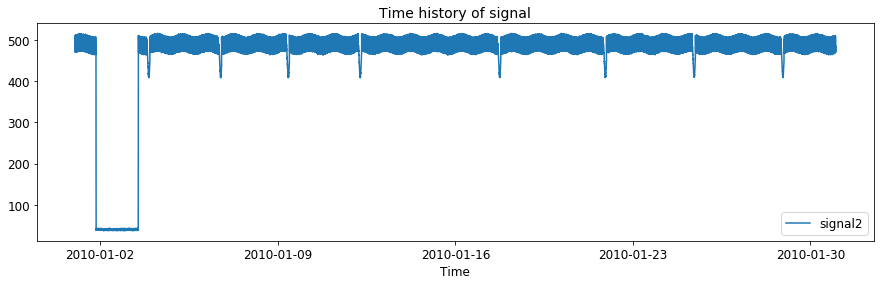

In [4]:
from ADTS.data_analysis import plot_data
%matplotlib inline
# else try 
# %matplotlib notebook 
# for more control on the plots in notebook

plot_data(data = data, # pandas dataframe
          column = 'signal2',
          figsize = (15,4), # figure size
          title = 'Time history of signal', # figure title
          kind = 'line' # kind of plot
         ) 

Plot shows that signal has a base value near 500 and signal has nearly consistent oscillations. The signal attains a very low value in the beginning for some time. This may represent the inoperative times. There are few drops in the signals that may represent a common pattern for all the signals. Let's find out more.

### Box plot of signals

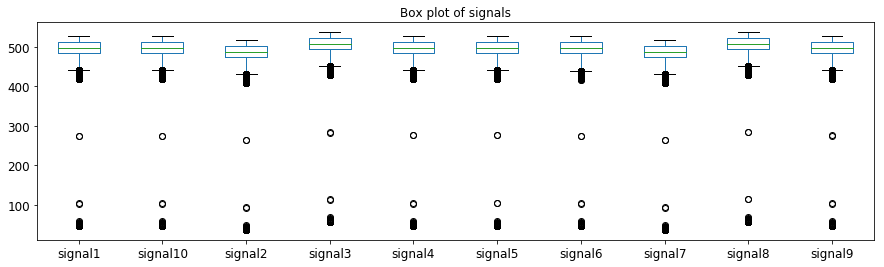

In [5]:
from ADTS.data_analysis import plot_data

plot_data(data, # pandas dataframe 
          column = data.columns, #box plot for all columns
          figsize = (15,4), # figure size
          title = 'Box plot of signals', # figure title
          kind = 'box' # kind of plot
         ) 

Box plot indicates that all the signals are similarly distributed with different mean value.

### Correlation analysis

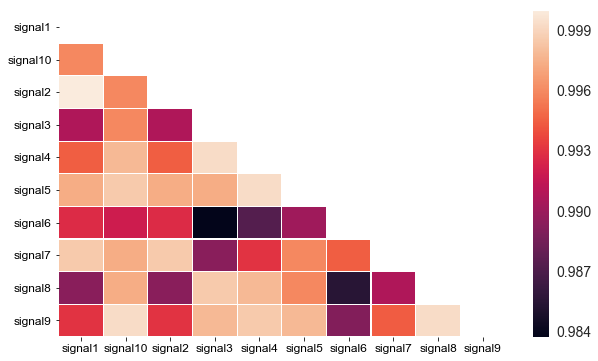

In [6]:
from ADTS.data_analysis import correlation_analysis

correlation_analysis(data = data, # pandas dataframe
                     figsize = (10,6) # figure size 
                    )

The numeric range of color bar indicates that the signals are highly correlated and have similar behavior.

### Fourier transform and spectrogram analysis

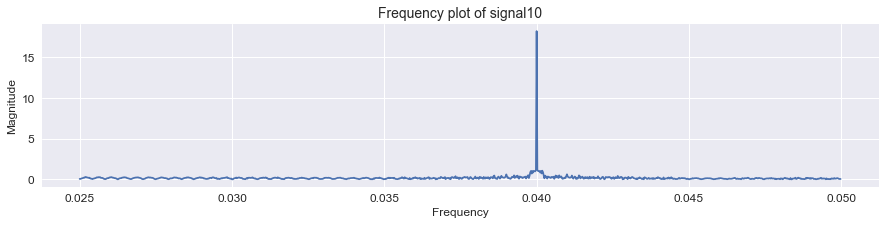

Peak value in this zoom plot appears at time period : 25.00
and Frequency is 0.04000


In [7]:
from ADTS.data_analysis import fourier_analysis

fourier_analysis(data, # pandas dataframe
                 column = 'signal10', # signal to analyze
                 T = 1.0, # sampling time period
                 zoom_in = [20,40], # zoom the frequency plot for this region of time-period
                 figsize = (15,3)
                )

The location of peak suggests that the signal has oscillations mostly of this frequency and could correspond to normal operations at this frequency.

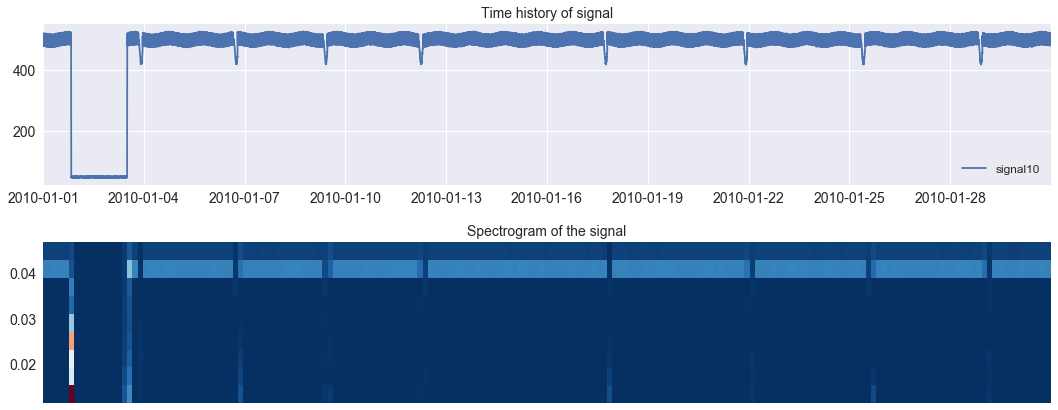

In [8]:
from ADTS.data_analysis import spectrogram_analysis

spectrogram_analysis(data, # pandas dataframe
                     column = 'signal10', # signal to analyze 
                     figsize = (15,6), 
                     zoom_in = [1.0/100,1.0/20], # zoom the frequency plot for this region of frequency)
                     title = ['Time history of signal', 'Spectrogram of the signal']
                    )

The first plot shows the original signal and second plot shows the spectrogram of this signal. The spectrogram helps to analyze the frequency components at different locations of the signals. We observe that there is frequency band near 0.04 where most of the time, signal exhibit its oscillatory behavior. It is confirmed that the signal shows normal operation most of the time at frequency of 0.04.

## Ground truth identification
Ground truth signatures are considered as normal operational events exhibited by all the signals. These signatures may appear at same time and may have same characteristics. Here we observe the frequency characteristics of signals to observe the ground truth. 

### Signal filtering
We make use of low pass/band pass filters to extract the frequency signal from its time domain.

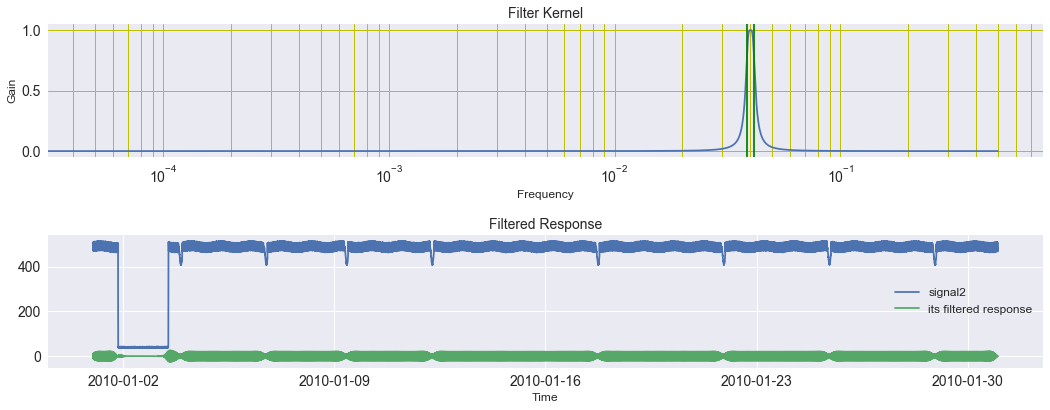

In [9]:
from ADTS.ground_truth_discovery import filter_design

# band pass response
bandpass_filter_response = filter_design(
    filter_param = {'type': 'bandpass', 'freq': [1.0/26, 1.0/24], 'order': 2, 'fs': 1}, # for band pass filter
            data = data,
     signal_to_plot = 'signal2',
         figsize = (15,6),
         signals = data.columns.values) # number of signals in the data

First plot shows the filter as per the design parameters. Gain is 1 for the band of frequencies of interest and gain is zero else where. Two vertical lines represents the limits of the frequency band. This filter is applied to the original signal. In the second plot, observe the magnitude of filtered response. The filtered signal will have low magnitude where original signal has frequency outside the band or vice-versa.

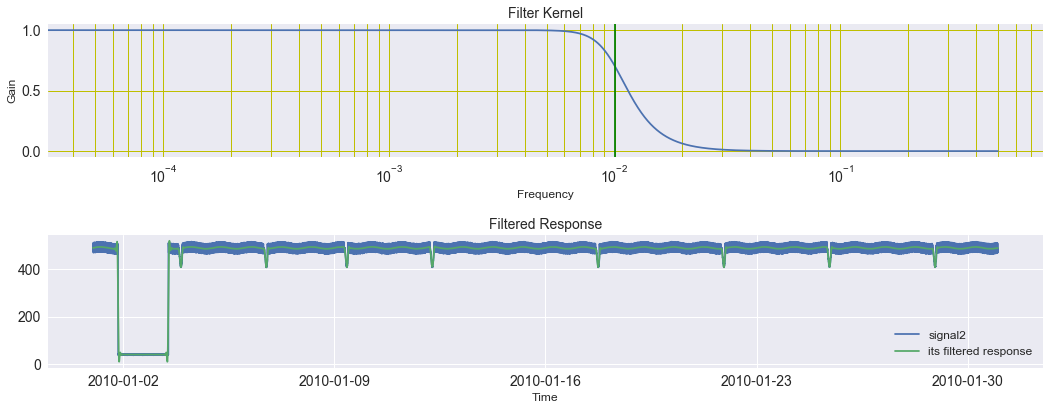

In [10]:
from ADTS.ground_truth_discovery import filter_design

# low pass response
lowpass_filter_response = filter_design(
    filter_param = {'type': 'lowpass', 'freq': 0.01, 'order': 4, 'fs': 1}, # for low pass filter
            data = data,
     signal_to_plot = 'signal2',
         figsize = (15,6),
         signals = data.columns.values)


First plot shows the low pass filter kernel with vertical line as threshold frequency. Second plot shows the original signal with its filtered response. Low pass filter is generally used for smoothing the signal and remove unwanted high frequency noise. This package (in this version) doesn't use this functionality in anomaly detection.

### Events identification in filtered data
Both, low pass or band pass response can be used to identify the signature and can be verified if it is common to all the signals. Here we consider the band pass response for this purpose. The utilization of low pass response is described for anomaly detection in the future version of this notebook.

In the band pass response (symmetric about x-axis = zero), we first find the peak profile that is generated by connecting all the peaks (upper envelope) of the band pass response. A threshold can be decided to detect a potential event. If these events are common to all the signals, these events are regarded as normal operations.

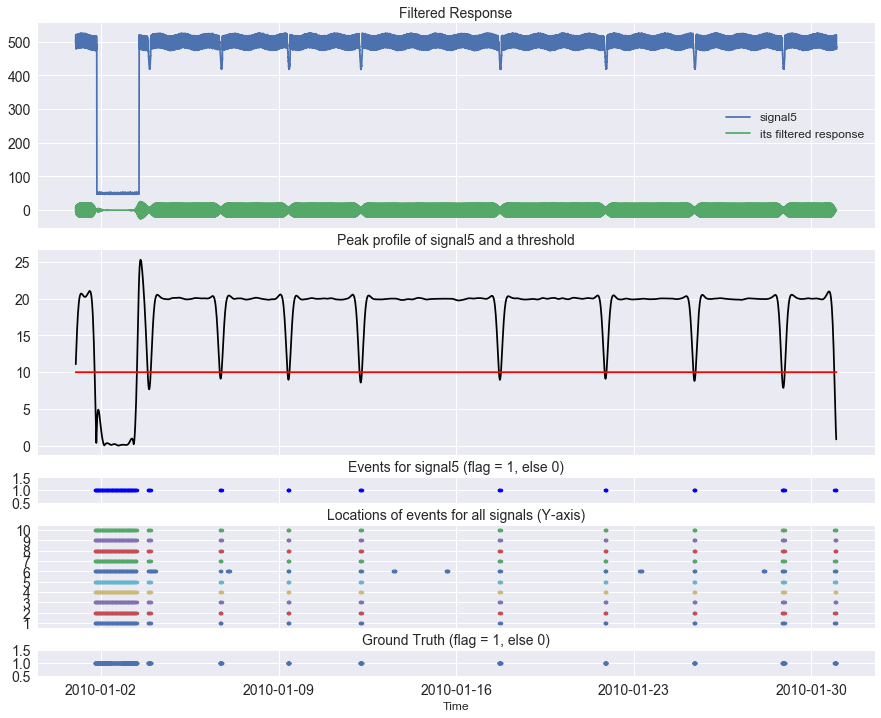

In [11]:
from ADTS.ground_truth_discovery import ground_truth_identification
#%matplotlib notebook
any_event, ground_events = ground_truth_identification(data = data, 
                       filter_response = bandpass_filter_response, 
                       threshold = 10.0, 
                       window_for_ground_event_check = 30,
                       signal_to_plot = 'signal5', 
                       figsize = (15,12))


* 1st plot shows the signal and its filtered response
* 2nd plot shows the peaks profile of the filtered response and a threshold defined by user
* 3rd plot shows the location of events (peaks profile < threshold) for the signal
* 4th plot shows the location of such events for all the signals. We observe that a signal has few more events than others. Locations of all the events will help in selecting normal training data for modeling.
* 5th plot shows the location of ground truth events that are shared by all the signals. 

## Anomaly detection techniques

### Train Test Data
Here we are collecting training and testing data based on train_test_split_time. Further, we collect normal training data where we avoid the data of cover time window around any event.

In [12]:
from ADTS.anomaly_detection import train_test_data

train_data, test_data, normal_train_data = train_test_data(data = data, 
                                                           any_event = any_event,
                                                           sampling = 'minutes', # {'minutes','seconds','milliseconds}
                                                           train_test_split_time = '2010-01-22 23:59:00',
                                                           cover = 180, # for collecting normal_train_data
                                                           ) 

### Hotelling's T-squared Statistic Model

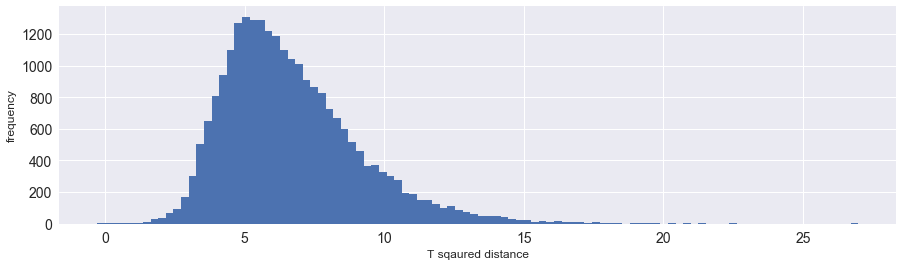

In [13]:
from ADTS.anomaly_detection import hotelling_T2_train

normal_train_data_mean, normal_train_data_covariance, \
normal_train_data_T2 = hotelling_T2_train(normal_train_data= normal_train_data, 
                   ifPlot = True, 
                   figsize = (15,4))

This distribution is generated using T-squared statistics over all the normal training data samples. The limits of this distribution provides us an idea about threshold for any abnormal event not captured in normal training data.

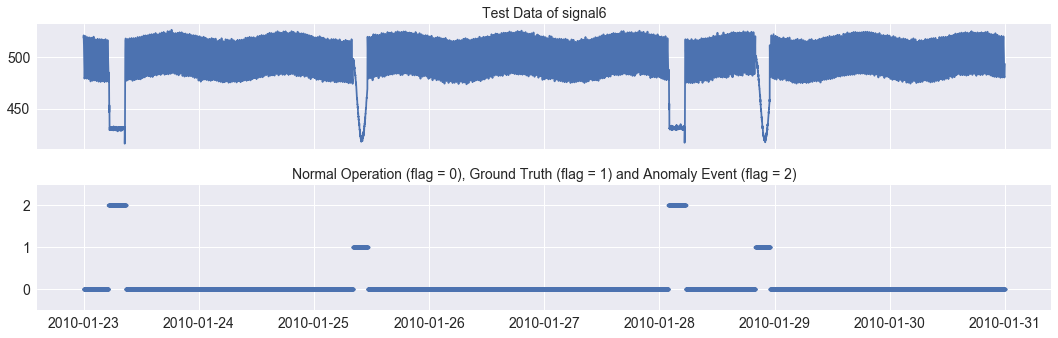

In [14]:
from ADTS.anomaly_detection import hotelling_T2_test

test_data_T2 = hotelling_T2_test(test_data = test_data, 
                                 ground_events = ground_events,
                                 window_check = 60, # minutes
                                 normal_train_data_mean = normal_train_data_mean, 
                                 normal_train_data_covariance = normal_train_data_covariance, 
                                 ifPlot = True, 
                                 figsize = (15,5),
                                 signal_to_plot = 'signal6', 
                                 thresholds = [-100,100])

First plot shows the original signal (test data) and second plot shows the flags (= 0 for normal operations, = 1 for ground truth events, = 2 for anomalous events). The statistical model raises the alert for the events (ground truth and anomaly) when T-squared statistics is outside the (min, max) thresholds. The ground truth events are filtered from these events using the [Events identification in filtered data](#Events-identification-in-filtered-data) procedure.